In [0]:
!wget https://www.dropbox.com/s/tcwbjzghs1xu8vv/ratings.csv

--2020-06-14 18:20:15--  https://www.dropbox.com/s/tcwbjzghs1xu8vv/ratings.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tcwbjzghs1xu8vv/ratings.csv [following]
--2020-06-14 18:20:15--  https://www.dropbox.com/s/raw/tcwbjzghs1xu8vv/ratings.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccf1fc85170e8b95d1ef77a4d95.dl.dropboxusercontent.com/cd/0/inline/A5oSk37P2FxvLCz4ALU5FOK_pOHI8dNqghm-oTf-i7N-wfYg7r3tH2ec59Xx0qnO7ZsLwTkvccO0WOj77eRafnOxpqVyPmNxwRnYeCqZo_y4QdFZkx9v92Zya8gZJ5WcBRo/file# [following]
--2020-06-14 18:20:16--  https://uccf1fc85170e8b95d1ef77a4d95.dl.dropboxusercontent.com/cd/0/inline/A5oSk37P2FxvLCz4ALU5FOK_pOHI8dNqghm-oTf-i7N-wfYg7r3tH2ec59Xx0qnO7ZsLwTkvccO0WOj77eRafnOxpqVyPmNxwRnYeCqZo_y4QdFZkx

In [0]:
!pip install emoji text-cleaner keras sklearn pandas numpy seaborn

     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=01dd21bd7fd91b42e06dfc3623d56f7c2c8ab72ee6d0ff3446d433733d61028d
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.zh.300.vec.gz

--2020-06-14 18:22:54--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.zh.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1358817100 (1.3G) [binary/octet-stream]
Saving to: ‘cc.zh.300.vec.gz’

cc.zh.300.vec.gz    100%[===================>]   1.26G  10.4MB/s    in 2m 7s   

2020-06-14 18:25:02 (10.2 MB/s) - ‘cc.zh.300.vec.gz’ saved [1358817100/1358817100]



In [0]:
!gunzip cc.zh.300.vec.gz

In [0]:
import pandas as pd
import numpy as np
import re
import emoji

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from text_cleaner import remove
from text_cleaner.processor.chinese import CHINESE, CHINESE_SYMBOLS_AND_PUNCTUATION
from text_cleaner import remove
from text_cleaner.processor.common import ASCII, SYMBOLS_AND_PUNCTUATION_EXTENSION, GENERAL_PUNCTUATION
from sklearn.utils import resample
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
movie_reviews = pd.read_csv("ratings.csv")

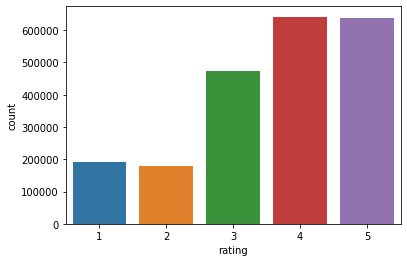

In [0]:
sns.countplot(x='rating', data=movie_reviews)

In [0]:
def escape_emoji(text):
    emoji_pattern = re.compile(
        u'(\U0001F1F2\U0001F1F4)|'       # Macau flag
        u'([\U0001F1E6-\U0001F1FF]{2})|' # flags
        u'([\U0001F600-\U0001F64F])'     # emoticons
        "+", flags=re.UNICODE)
    return emoji_pattern.sub('', text)


def escape_en_char(string):
    en_pattern = "[a-zA-Z0-9]+"
    one_str = re.sub(en_pattern, ' ', string)
    return one_str

def remove_pun(string):
    s = SYMBOLS_AND_PUNCTUATION_EXTENSION.remove(string)
    s = GENERAL_PUNCTUATION.remove(string)
    s = CHINESE_SYMBOLS_AND_PUNCTUATION.remove(string)
    return s

In [0]:
def preprocess_text(sens):
    sentence = escape_en_char(sens)
    sentence = escape_emoji(sens)
    sentence = remove_pun(sens)
    sentence = ' '.join(sentence.split())
    return sentence

In [0]:
movie_reviews['comment'] = movie_reviews['comment'].apply(preprocess_text)

In [0]:
def change(x):
    if x==3:
        return 1
    elif x>=4:
        return 2
    else:
        return 0

In [0]:
y = movie_reviews['rating'].apply(change)

In [0]:
y_real = y.values
x_real = movie_reviews['comment']

In [0]:
x_real_train,x_real_test,y_train_real, y_test_real = train_test_split(x_real,y_real, test_size=0.30, random_state=42)

In [0]:
y = pd.get_dummies(y).values

In [0]:
y = np.array(list(map(lambda x: x , y)))

In [0]:
y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(movie_reviews['comment'], y, test_size=0.30, random_state=42)

In [0]:
tokenizer = Tokenizer(char_level = True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X_train)

In [0]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
fasttext_file = open('cc.zh.300.vec', encoding="utf8")

for line in fasttext_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
fasttext_file.close()

In [0]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
from keras.layers import CuDNNLSTM,Bidirectional,SpatialDropout1D

#LSTM Model

In [0]:
model_rnn = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_rnn.add(embedding_layer)
model_rnn.add(SpatialDropout1D(0.2))
model_rnn.add(CuDNNLSTM(100))
model_rnn.add(Dense(3, activation='softmax'))
model_rnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          2669700   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 300)          0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 100)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 2,830,803
Trainable params: 161,103
Non-trainable params: 2,669,700
_________________________________________________________________


In [0]:
history_b = model_rnn.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

W0503 04:51:06.702733 140245380151104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 1190031 samples, validate on 297508 samples
Epoch 1/15
1190031/1190031 [==============================] - 89s 75us/step - loss: 0.9146 - accuracy: 0.6066 - val_loss: 0.8748 - val_accuracy: 0.6149
Epoch 2/15
1190031/1190031 [==============================] - 85s 72us/step - loss: 0.7643 - accuracy: 0.6635 - val_loss: 0.6849 - val_accuracy: 0.7071
Epoch 3/15
1190031/1190031 [==============================] - 85s 72us/step - loss: 0.6398 - accuracy: 0.7250 - val_loss: 0.6177 - val_accuracy: 0.7359
Epoch 4/15
1190031/1190031 [==============================] - 85s 71us/step - loss: 0.6083 - accuracy: 0.7393 - val_loss: 0.5984 - val_accuracy: 0.7444
Epoch 5/15
1190031/1190031 [==============================] - 85s 71us/step - loss: 0.5926 - accuracy: 0.7465 - val_loss: 0.5889 - val_accuracy: 0.7500
Epoch 6/15
1190031/1190031 [==============================] - 84s 71us/step - loss: 0.5828 - accuracy: 0.7507 - val_loss: 0.5768 - val_accuracy: 0.7546
Epoch 7/15
1190031/1190031 [=======

In [0]:
score_lstm, acc_lstm = model_rnn.evaluate(X_test, y_test,batch_size=128)

637517/637517 [==============================] - 20s 31us/step


In [0]:
print('LSTM Model score is:' ,score_lstm)
print('LSTM Model accuracy is:' ,acc_lstm)

LSTM Model score is: 0.5674562266906423
LSTM Model accuracy is: 0.7579280138015747


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred_rnn = model_rnn.predict_classes(X_test)
print(Y_pred_rnn)

[2 2 2 ... 2 2 0]


In [0]:
Y_pred_rnn = list(map(lambda x: x , Y_pred_rnn))

#Classification Report : LSTM Model Binary Fasttext

In [0]:
print('Training Dataset Size :',X_train.shape)
print('Testing Dataset Size :',X_test.shape)
classes = ['0','1','2']
print(' Classification Report: LSTM 3_class Model Fasttext\n',classification_report(y_test_real,Y_pred_rnn,target_names = classes),'\n')

Training Dataset Size : (1487539, 100)
Testing Dataset Size : (637517, 100)
 Classification Report: LSTM 3_class Model Fasttext
               precision    recall  f1-score   support

           0       0.76      0.64      0.69    111173
           1       0.58      0.40      0.48    142306
           2       0.80      0.92      0.86    384038

    accuracy                           0.76    637517
   macro avg       0.71      0.66      0.67    637517
weighted avg       0.74      0.76      0.74    637517
 



In [0]:
y_test_real = y_test_real.tolist()

In [0]:
x_real_test = x_real_test.tolist()

In [0]:
predicted_data_rnn = pd.DataFrame([x_real_test, y_test_real , Y_pred_rnn])

In [0]:
predicted_data_rnn_t = predicted_data_rnn.T

In [0]:
predicted_data_rnn_t.head(50)

,0,1,2
0,为数不多的好看的喜剧,2,2
1,故事完成度很高 比起之前作品更接地气 剧情太好猜了点 不过总算完成了一个非短片,2,2
2,这世上最可怕的是人性,2,2
3,强烈推荐,2,2
4,杨幂不亏为烂片女王 黄晓明你让我在合伙人里对你的好感一点点磨没了 反正杨幂你现在给我的映像就...,0,0
5,已经上映了啊 我刚看完 开头套路有点无聊但场面很壮观 故事逻辑清晰 关键点都能交代清楚 总之...,2,2
6,后悔没去影院看,2,2
7,简直是 在挑战自己的忍耐底限 强迫症看了开头就一定要看完 简直如外星人般无法理解 这种东西的...,0,0
8,被鞋拔子脸的大圣帅一脸 QWQ 最后变身眼睛放光从耳朵里抽出金箍棒的场面简直是 简直是 Qw...,2,2
9,还是挺不错的,2,2


#Accuracy and Loss Graph Plots for LSTM

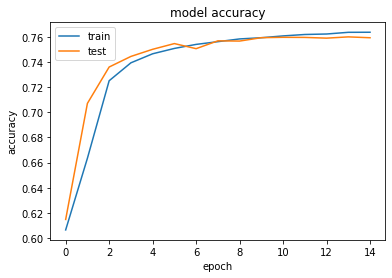

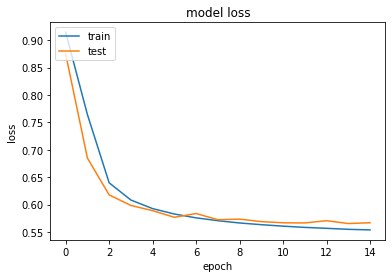

In [0]:
import matplotlib.pyplot as plt

plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

#Bi-LSTM Model

In [0]:
model_brnn = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_brnn.add(embedding_layer)
model_brnn.add(SpatialDropout1D(0.2))
model_brnn.add(Bidirectional(CuDNNLSTM(100)))
model_brnn.add(Dense(3, activation='softmax'))
model_brnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model_brnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          2669700   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 100, 300)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               321600    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 2,991,903
Trainable params: 322,203
Non-trainable params: 2,669,700
_________________________________________________________________


In [0]:
history_c = model_brnn.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Train on 1190031 samples, validate on 297508 samples
Epoch 1/20
1190031/1190031 [==============================] - 151s 127us/step - loss: 0.7029 - accuracy: 0.6954 - val_loss: 0.6250 - val_accuracy: 0.7326
Epoch 2/20
1190031/1190031 [==============================] - 150s 126us/step - loss: 0.6203 - accuracy: 0.7336 - val_loss: 0.6068 - val_accuracy: 0.7399
Epoch 3/20
1190031/1190031 [==============================] - 149s 126us/step - loss: 0.5963 - accuracy: 0.7446 - val_loss: 0.5884 - val_accuracy: 0.7492
Epoch 4/20
1190031/1190031 [==============================] - 150s 126us/step - loss: 0.5829 - accuracy: 0.7505 - val_loss: 0.5799 - val_accuracy: 0.7521
Epoch 5/20
1190031/1190031 [==============================] - 150s 126us/step - loss: 0.5735 - accuracy: 0.7550 - val_loss: 0.5747 - val_accuracy: 0.7550
Epoch 6/20
1190031/1190031 [==============================] - 150s 126us/step - loss: 0.5664 - accuracy: 0.7579 - val_loss: 0.5725 - val_accuracy: 0.7559
Epoch 7/20
1190031/1190

In [0]:
score_bilstm, acc_bilstm = model_brnn.evaluate(X_test, y_test,batch_size=128)

637517/637517 [==============================] - 32s 51us/step


In [0]:
print('Bi-LSTM Model score is:' ,score_bilstm)
print('Bi-LSTM Model accuracy is:' ,acc_bilstm)

Bi-LSTM Model score is: 0.5797442401885219
Bi-LSTM Model accuracy is: 0.7581084370613098


In [0]:
from sklearn.metrics import classification_report
Y_pred_brnn = model_brnn.predict_classes(X_test)
print(Y_pred_brnn)

[2 2 2 ... 2 1 0]


In [0]:
Y_pred_brnn = list(map(lambda x: x , Y_pred_brnn))

#Classification Report : Bi-LSTM Model Binary Fasttext

In [0]:
print('Training Dataset Size :',X_train.shape)
print('Testing Dataset Size :',X_test.shape)
classes = ['0','1','2']
print(' Classification Report: Bi-LSTM 3_Class Model Fasttext\n',classification_report(y_test_real,Y_pred_brnn,target_names = classes),'\n')

Training Dataset Size : (1487539, 100)
Testing Dataset Size : (637517, 100)
 Classification Report: Bi-LSTM 3_Class Model Fasttext
               precision    recall  f1-score   support

           0       0.72      0.68      0.70    111173
           1       0.57      0.42      0.48    142306
           2       0.82      0.90      0.86    384038

    accuracy                           0.76    637517
   macro avg       0.70      0.67      0.68    637517
weighted avg       0.74      0.76      0.75    637517
 



In [0]:
predicted_data_brnn = pd.DataFrame([x_real_test, y_test_real , Y_pred_brnn])

In [0]:
predicted_data_brnn_t = predicted_data_brnn.T

In [0]:
predicted_data_brnn_t.head(50)

,0,1,2
0,为数不多的好看的喜剧,2,2
1,故事完成度很高 比起之前作品更接地气 剧情太好猜了点 不过总算完成了一个非短片,2,2
2,这世上最可怕的是人性,2,2
3,强烈推荐,2,2
4,杨幂不亏为烂片女王 黄晓明你让我在合伙人里对你的好感一点点磨没了 反正杨幂你现在给我的映像就...,0,0
5,已经上映了啊 我刚看完 开头套路有点无聊但场面很壮观 故事逻辑清晰 关键点都能交代清楚 总之...,2,2
6,后悔没去影院看,2,2
7,简直是 在挑战自己的忍耐底限 强迫症看了开头就一定要看完 简直如外星人般无法理解 这种东西的...,0,0
8,被鞋拔子脸的大圣帅一脸 QWQ 最后变身眼睛放光从耳朵里抽出金箍棒的场面简直是 简直是 Qw...,2,2
9,还是挺不错的,2,2


#Accuracy and Loss Graph Plot for Bi-LSTM

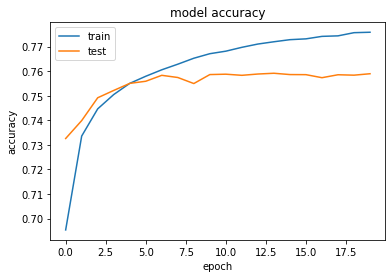

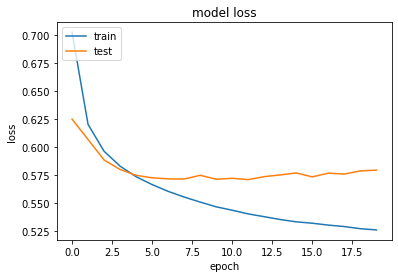

In [0]:
import matplotlib.pyplot as plt

plt.plot(history_c.history['accuracy'])
plt.plot(history_c.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history_c.history['loss'])
plt.plot(history_c.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [0]:
Parameters For Each Model:

1) LSTM :
-->input_size/Input Layer = 100
-->activation = relu
-->Output/Dense Layer = 3 (Activation = Softmax)
-->Learning Rate = 0.001
-->Optimizer = RMSProp


2) Bidirectional-LSTM :
-->input_size/Input Layer = 100
-->activation = relu
-->Output/Dense Layer = 3 (Activation = Softmax)
-->Learning Rate = 0.001
-->Optimizer = Adam